In this notebook we will try to obtain BH and Halo catalogue and compute their 2pCFs

In [1]:
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import illustris_python as il
from tqdm import tqdm
import h5py as hp5

In [2]:
# Pylinas core modules
import Pk_library as PKL
import MAS_library as MASL

In [63]:
from matplotlib import colors
from matplotlib import cm
from sctriangulate.colors import build_custom_continuous_cmap

In [3]:
baseUrl = 'http://www.illustris-project.org/api/'
headers = {"api-key": "10e80f2feaf19875ee764375e874499d"}

def get(path, params=None):
     # make HTTP GET request to path
     headers = {"api-key":"10e80f2feaf19875ee764375e874499d"}
     r = requests.get(path, params=params, headers=headers)

     # raise exception if response code is not HTTP SUCCESS (200)
     r.raise_for_status()

     if r.headers['content-type'] == 'application/json':
         return r.json() # parse json responses automatically

     if 'content-disposition' in r.headers:
         filename = r.headers['content-disposition'].split("filename=")[1]
         with open(filename, 'wb') as f:
             f.write(r.content)
         return filename # return the filename string

     return r
r = get(baseUrl)

In [4]:
names = [r['simulations'][i]['name'] for i in range(len(r['simulations']))]
names

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'TNG50-1',
 'TNG50-1-Dark',
 'TNG50-2',
 'TNG50-2-Dark',
 'TNG50-3',
 'TNG50-3-Dark',
 'TNG50-4',
 'TNG50-4-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG

We will try to obtain the catalog for TNG300-2

In [5]:
# getting index of TNG300-2
i = names.index('TNG300-2')
print('index=', i)

sim = get(r['simulations'][i]['url'])
sim.keys()

index= 14


dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [6]:
# printing box size of simulation and number of DM particles
print('box size:', sim['boxsize'])
print('number of DM particles:', sim['num_dm'])

box size: 205000.0
number of DM particles: 1953125000


In [7]:
#getting the snapshot 
snaps = get(sim['snapshots'])

# snapshot at z=0
snap = snaps[-1]

# getting full metadata
meta = get(snap['url'])
meta

{'simulation': 'http://www.illustris-project.org/api/TNG300-2/',
 'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_gas': 1842869890,
 'num_dm': 1953125000,
 'num_trmc': 1953125000,
 'num_stars': 45356994,
 'num_bhs': 635643,
 'num_groups_fof': 2605111,
 'num_groups_subfind': 2471022,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 548727769424.0,
 'filesize_groupcat': 2280897396.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.illustris-project.org/api/TNG300-2/snapshots/99/',
 'subhalos': 'http://www.illustris-project.org/api/TNG300-2/snapshots/99/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.illustris-project.org/api/TNG300-2/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.illustris-project.org/api/TNG300-2/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.illustris-project.org/api/TNG300-2/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  

Now we get the catalog for the TNG300-2

In [36]:
b_url = 'http://www.illustris-project.org/api/TNG300-2/'
sim_meta = get(b_url)

print('Number of catalog:', sim_meta['num_files_groupcat'])
for i in tqdm(range(sim_meta['num_files_groupcat']), "Getting Catalogs"):
    file_url = b_url+"files/groupcat-99."+str(i)+".hdf5"
    saved_filename = get(file_url)

Number of catalog: 100


Getting Catalogs: 100%|██████████| 100/100 [10:34<00:00,  6.35s/it]


## Computing 2pCF of the TNG300-2 catalog from SubFind halos

In [55]:
# getting the positions of the group catalog from subfind
basepath = 'TNG300-2/groupcat/fof_subhalo_tab_099.'

data = np.array([[0,0,0]], dtype=np.float32)
mass = np.array([0], dtype=np.float32)

for i in tqdm(range(sim_meta['num_files_groupcat']), desc="Reading Subfind_Subhalops, Subhalomass from Catalogs"):
    filename = basepath+str(i)+'.hdf5'
    f = hp5.File(filename, 'r')
    data = np.concatenate((data, f['Subhalo/SubhaloPos'][:]), axis=0)
    mass = np.concatenate((mass, f['Subhalo/SubhaloMass'][:]), axis=0)
    f.close()

data = data[1:]
mass = mass[1:]

Reading Subfind_Subhalops, Subhalomass from Catalogs: 100%|██████████| 100/100 [00:00<00:00, 187.88it/s]


In [ ]:
#prininting the number of groups
print("Number of groups:", len(data))

### Computing the 2pCF

In [59]:
## computing xi(r)
grid = 256
BoxSize = 302.6
verbose = True
Np = len(data)
MAS = 'CIC'

print("Getting position and delta array")
pos = np.array(data/1000, dtype=np.float32)
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
print("Constructing 3D density field")
MASL.MA(pos, delta, BoxSize, MAS, W=mass, verbose=verbose) #Weighted my mass of each halo
# MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose) #without weights
delta /= np.mean(delta, dtype=np.float64);
delta -= 1.0

# compute the correlation function
print("Computing correlation function")
axis = 0
threads=12
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)


# get the attributes
print("Getting attributes")
r      = CF.r3D      #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes
print("Done!!")

Getting position and delta array
Constructing 3D density field

Using CIC mass assignment scheme with weights
Time taken = 0.284 seconds

Computing correlation function

Computing correlation function of the field...
Time to complete loop = 0.11
Time taken = 0.76 seconds
Getting attributes
Done!!


In [61]:
#getting on non-nan values#getting only non-nan values for log(xi0)
xi0_filtered = xi0[~np.isnan(np.log10(xi0))]
r_filterd = r[~np.isnan(np.log10(xi0))]

/tmp/ipykernel_23106/1769430775.py:2: RuntimeWarning: invalid value encountered in log10
  xi0_filtered = xi0[~np.isnan(np.log10(xi0))]
/tmp/ipykernel_23106/1769430775.py:3: RuntimeWarning: invalid value encountered in log10
  r_filterd = r[~np.isnan(np.log10(xi0))]


Plotting


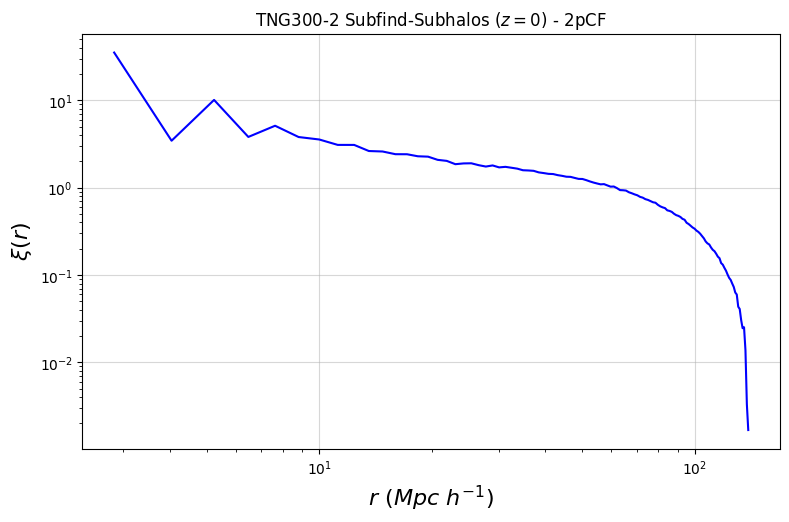

In [62]:
# log-log plot
print("Plotting")
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(r_filterd,xi0_filtered, color='blue')
#setting log scale
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)

plt.title('TNG300-2 Subfind-Subhalos ($z=0$) - 2pCF')
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

# plt.savefig('2pCF_TNG300-2_SubfindSubhalos.jpg', dpi=300, bbox_inches='tight')
# plt.show()

In [70]:
# saving r_filterd and xi0_filtered in a HDF5 file in a Group
print("Saving data")
h5f = hp5.File('2pCF_TNG.hdf5', 'w')
# creating a group
grp = h5f.create_group("TNG300-2-Subfind_Subhalos")
# creating a dataset
dset = grp.create_dataset("xi0", data=xi0_filtered)
dset = grp.create_dataset("r", data=r_filterd)  
# h5f.close()
print("Done!!")

Saving data
Done!!


## Getting data for FoF halos

In [72]:
# getting positions of the group catalog from FoF
data = np.array([[0,0,0]], dtype=np.float32)
mass = np.array([0], dtype=np.float32)

for i in tqdm(range(sim_meta['num_files_groupcat']), desc="Reading FoF- Positoion, Mass from Catalogs"):
    filename = basepath+str(i)+'.hdf5'
    f = hp5.File(filename, 'r')
    data = np.concatenate((data, f['Group/GroupPos'][:]), axis=0)
    mass = np.concatenate((mass, f['Group/GroupMass'][:]), axis=0)
    f.close()

data = data[1:]
mass = mass[1:]

Reading FoF- Positoion, Mass from Catalogs: 100%|██████████| 100/100 [00:02<00:00, 38.15it/s]


In [73]:
#prininting the number of groups
print("Number of groups:", len(data))

Number of groups: 2605111


### computing 2pCF

In [74]:
## computing xi(r)
grid = 256
BoxSize = 302.6
verbose = True
Np = len(data)
MAS = 'CIC'

print("Getting position and delta array")
pos = np.array(data/1000, dtype=np.float32)
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
print("Constructing 3D density field")
MASL.MA(pos, delta, BoxSize, MAS, W=mass, verbose=verbose) #Weighted my mass of each halo
# MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose) #without weights
delta /= np.mean(delta, dtype=np.float64);
delta -= 1.0

# compute the correlation function
print("Computing correlation function")
axis = 0
threads=12
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)


# get the attributes
print("Getting attributes")
r      = CF.r3D      #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes
print("Done!!")

Getting position and delta array
Constructing 3D density field

Using CIC mass assignment scheme with weights
Time taken = 0.226 seconds

Computing correlation function

Computing correlation function of the field...
Time to complete loop = 0.10
Time taken = 0.61 seconds
Getting attributes
Done!!


In [75]:
#getting only non-nan values for log(xi0)
xi0_filtered = xi0[~np.isnan(np.log10(xi0))]
r_filterd = r[~np.isnan(np.log10(xi0))]

/tmp/ipykernel_23106/3522207347.py:2: RuntimeWarning: invalid value encountered in log10
  xi0_filtered = xi0[~np.isnan(np.log10(xi0))]
/tmp/ipykernel_23106/3522207347.py:3: RuntimeWarning: invalid value encountered in log10
  r_filterd = r[~np.isnan(np.log10(xi0))]


Plotting


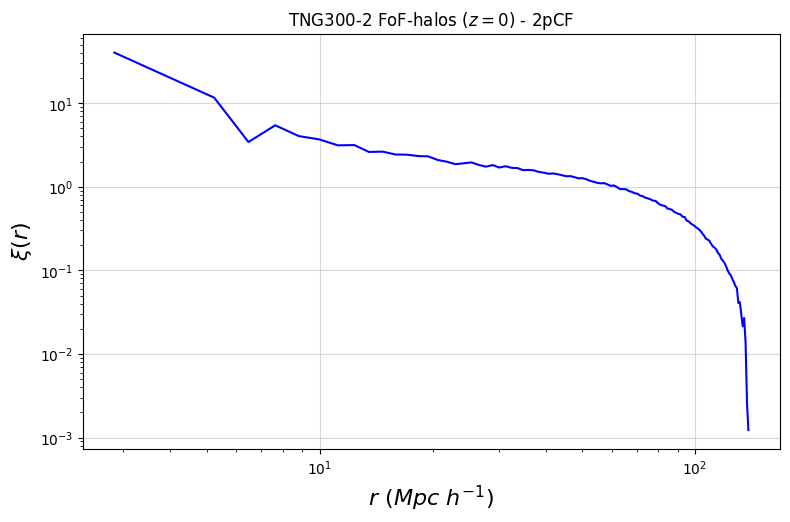

In [77]:
# log-log plot
print("Plotting")
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(r_filterd,xi0_filtered, color='blue')
#setting log scale
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)

plt.title('TNG300-2 FoF-halos ($z=0$) - 2pCF')
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

# plt.savefig('2pCF_TNG300-2_FoFhalos.jpg', dpi=300, bbox_inches='tight')
# plt.show()

In [78]:
# saving r_filterd and xi0_filtered in a HDF5 file in a Group
print("Saving data")
# h5f = hp5.File('2pCF_TNG.hdf5', 'w') #not needed since file aready exists
# creating a group
grp1 = h5f.create_group("TNG300-2-FoF_halos")
# creating a dataset
dset = grp1.create_dataset("xi0", data=xi0_filtered)
dset = grp1.create_dataset("r", data=r_filterd)  
h5f.keys()
h5f.close()
print("Done!!")

Saving data
Done!!


# Plotting 2pCF of FoF and Subfind halos

In [82]:
#reading data from the HDF5 file
h5f = hp5.File('2pCF_TNG.hdf5', 'r')
grp1 = h5f['TNG300-2-Subfind_Subhalos']
grp2 = h5f['TNG300-2-FoF_halos']

#getting the data for Subfind
xi0_filtered_S = grp1['xi0'][:]
r_filterd_S = grp1['r'][:]

#getting the data for FoF
xi0_filtered_F = grp2['xi0'][:]
r_filterd_F = grp2['r'][:]

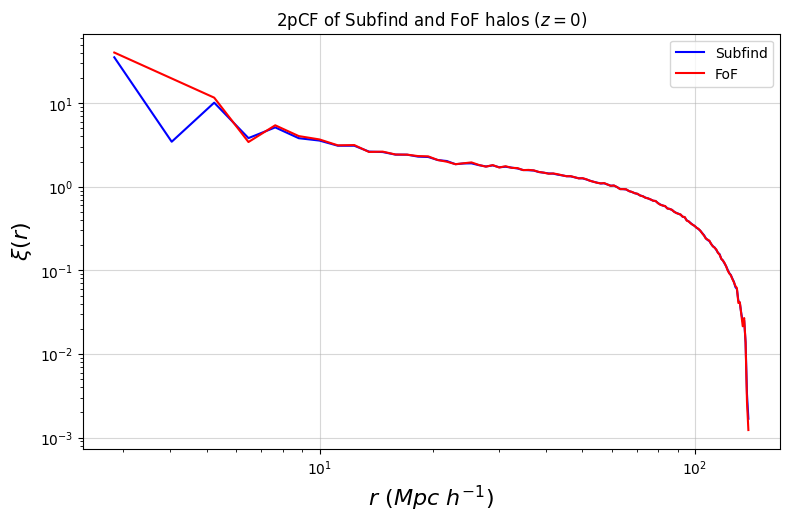

In [84]:
#plotting
# changing font style to Serif
plt.rc('font',**{'family':'serif','serif':['Times']})

plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(r_filterd_S,xi0_filtered_S, color='blue', label='Subfind')
plt.plot(r_filterd_F,xi0_filtered_F, color='red', label='FoF')
#setting log scale
plt.xscale('log')
plt.yscale('log')

plt.legend()

# plt.xlim(0.1, 10)
plt.grid(alpha=0.5)
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)
plt.title('2pCF of Subfind and FoF halos ($z=0$)')

# plt.savefig('2pCF_Subfind_FoF.jpg', dpi=300, bbox_inches='tight')